# ACCRE Project - Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

In [2]:
# Read in fullsample_cleaned.csv as a dataframe
jobs = pd.read_csv("../data/fullsample_cleaned.csv")

# Read in fullsample_cleaned.csv as a dataframe
logs = pd.read_csv("../data/logs.csv")

In [3]:
# Convert BEGIN and END columns in jobs df to datetime type
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'])
jobs['END'] = pd.to_datetime(jobs['END'])

# Convert REQTIME, USEDTIME, JOBLENGTH columns in jobs df to timedelta type
jobs['REQTIME'] = pd.to_timedelta(jobs['REQTIME'])
jobs['USEDTIME'] = pd.to_timedelta(jobs['USEDTIME'])
jobs['JOBLENGTH'] = pd.to_timedelta(jobs['JOBLENGTH'])

# Convert DATE column in logs df to datetime type
logs['DATE'] = pd.to_datetime(logs['DATE'])

In [4]:
# Count the amount of jobs per hour and create new column
jobs['GROUP1H'] = jobs.groupby(pd.Grouper(key='END',freq='H')).transform('count')['JOBID'].sort_index()

## Question 1: Calculate some descriptive statistics for how many jobs per hour are being completed.

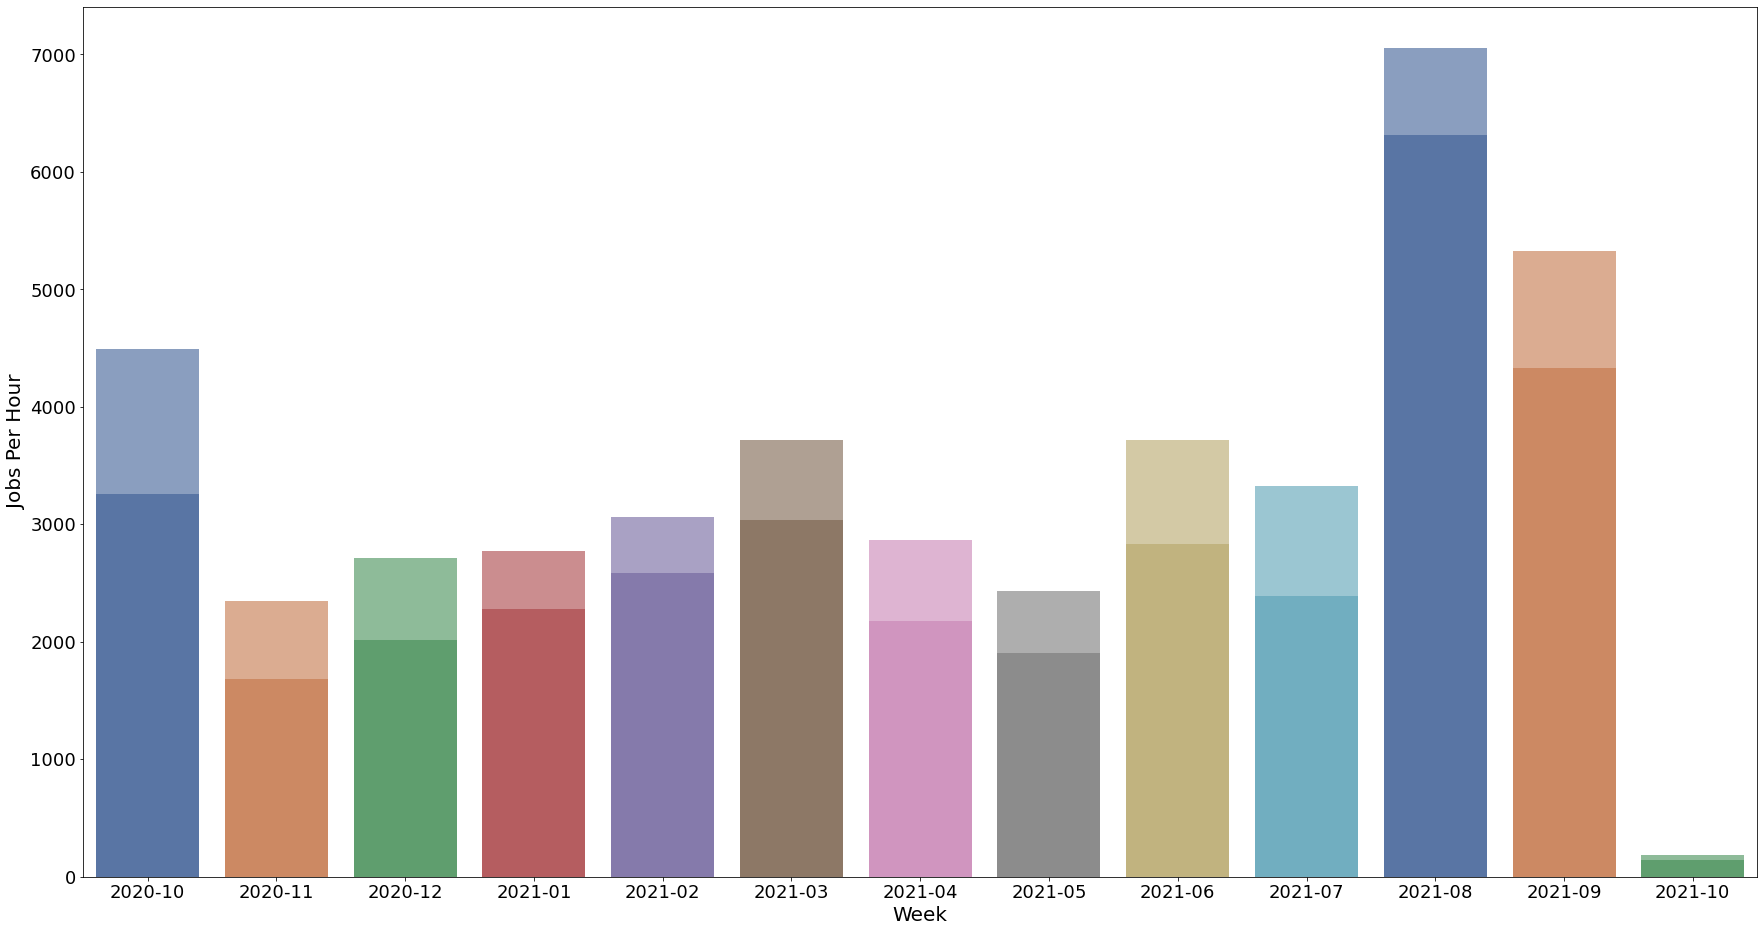

In [5]:
# Total jobs ended each month
weekly_jobs_ended_by_hour = jobs.groupby(pd.Grouper(key='END',freq='M')).count()/168
weekly_jobs_ended_by_hour = weekly_jobs_ended_by_hour.reset_index()

# Total jobs completed each month
weekly_jobs_completed_by_hour = jobs[jobs['STATE'] == 'COMPLETED'].groupby(pd.Grouper(key='END',freq='M')).count()/168
weekly_jobs_completed_by_hour = weekly_jobs_completed_by_hour.reset_index()

# Format date ticks for x axis and define fontsize
date_labels = weekly_jobs_ended_by_hour['END'].dt.strftime('%Y-%m')
fontsize = 20

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30,16))
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = weekly_jobs_ended_by_hour, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax,
            alpha = 0.7)
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = weekly_jobs_completed_by_hour, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax)

plt.xlabel('Week', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

ax.get_legend().set_visible(False);

In [6]:
jobs

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,REQMEMTOT,REQMEMPERCORE,GROUP1H
0,30853133,TIMEOUT,2021-08-06 11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,-125 days +00:00:00,-126 days +23:59:37,1,1,cgw-platypus,0:15,30 days 00:00:23,262144.0,262144.0,1812
1,30858137,TIMEOUT,2021-08-06 19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,-125 days +00:00:00,-126 days +23:59:46,1,32,cgw-tbi01,0:15,30 days 00:00:14,204800.0,6400.0,176
2,30935078,TIMEOUT,2021-08-09 16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,-121 days +00:00:00,-122 days +23:59:56,1,8,cgw-platypus,0:15,29 days 04:00:04,65536.0,8192.0,325
3,31364111_2,TIMEOUT,2021-08-17 07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,-101 days +15:00:00,-101 days +14:59:43,1,1,production,0:9,24 days 09:00:17,16384.0,16384.0,1041
4,31364111_3,COMPLETED,2021-08-17 07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,-101 days +15:00:00,-84 days +07:27:33,1,1,production,0:0,20 days 08:32:27,16384.0,16384.0,711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395229,25493434,COMPLETED,2020-10-31 23:39:00,2020-10-31 23:40:46,2000Mn,0.09M,-9 days +16:00:00,0 days 00:01:46,1,1,sam,0:0,0 days 00:01:46,2000.0,2000.0,506
7395230,25493435,COMPLETED,2020-10-31 23:39:13,2020-10-31 23:40:38,2000Mn,187.92M,-9 days +16:00:00,0 days 00:01:25,1,1,sam,0:0,0 days 00:01:25,2000.0,2000.0,506
7395231,25493476,COMPLETED,2020-10-31 23:46:29,2020-10-31 23:49:43,4096Mc,803.97M,0 days 12:00:00,0 days 00:03:14,1,1,production,0:0,0 days 00:03:14,4096.0,4096.0,506
7395232,25493515,COMPLETED,2020-10-31 23:49:44,2020-10-31 23:51:40,2000Mn,0.09M,-9 days +16:00:00,0 days 00:01:56,1,1,sam,0:0,0 days 00:01:56,2000.0,2000.0,506


In [7]:
jobs['END'].describe()

<ipython-input-7-6553b4168d73>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  jobs['END'].describe()


count                 7395234
unique                4109550
top       2020-12-18 09:41:23
freq                      559
first     2020-10-01 00:10:15
last      2021-10-07 20:41:11
Name: END, dtype: object

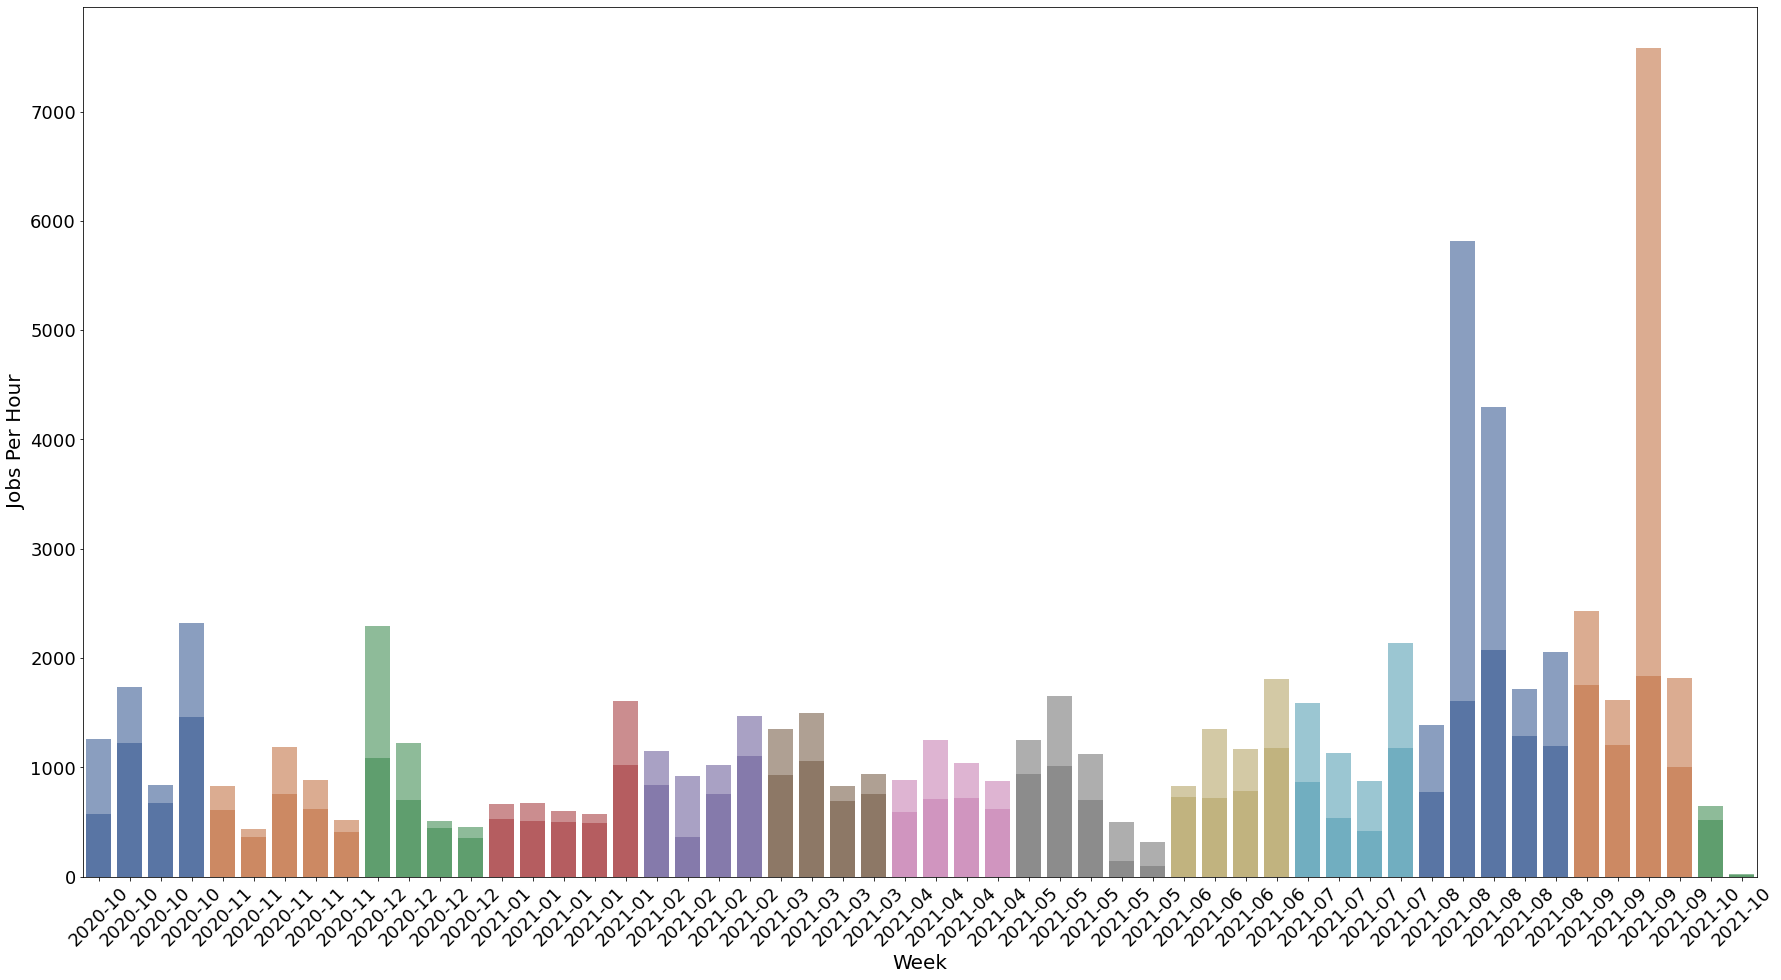

In [8]:
# Total jobs ended each month
weekly_jobs_ended_median = jobs.groupby(pd.Grouper(key='END',freq='W')).median()
weekly_jobs_ended_median = weekly_jobs_ended_median.reset_index()

# Total jobs completed each month
weekly_jobs_ended_by_hour = jobs.groupby(pd.Grouper(key='END',freq='W')).count()/168
weekly_jobs_ended_by_hour = weekly_jobs_ended_by_hour.reset_index()

# Format date ticks for x axis and define fontsize
date_labels = weekly_jobs_ended_by_hour['END'].dt.strftime('%Y-%m')
fontsize = 20

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30,16))
sns.barplot(x = 'END', 
            y = 'GROUP1H', 
            data = weekly_jobs_ended_median, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax,
            alpha = 0.7)
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = weekly_jobs_ended_by_hour, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax)

plt.xlabel('Week', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 45)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2);

ax.get_legend().set_visible(False);

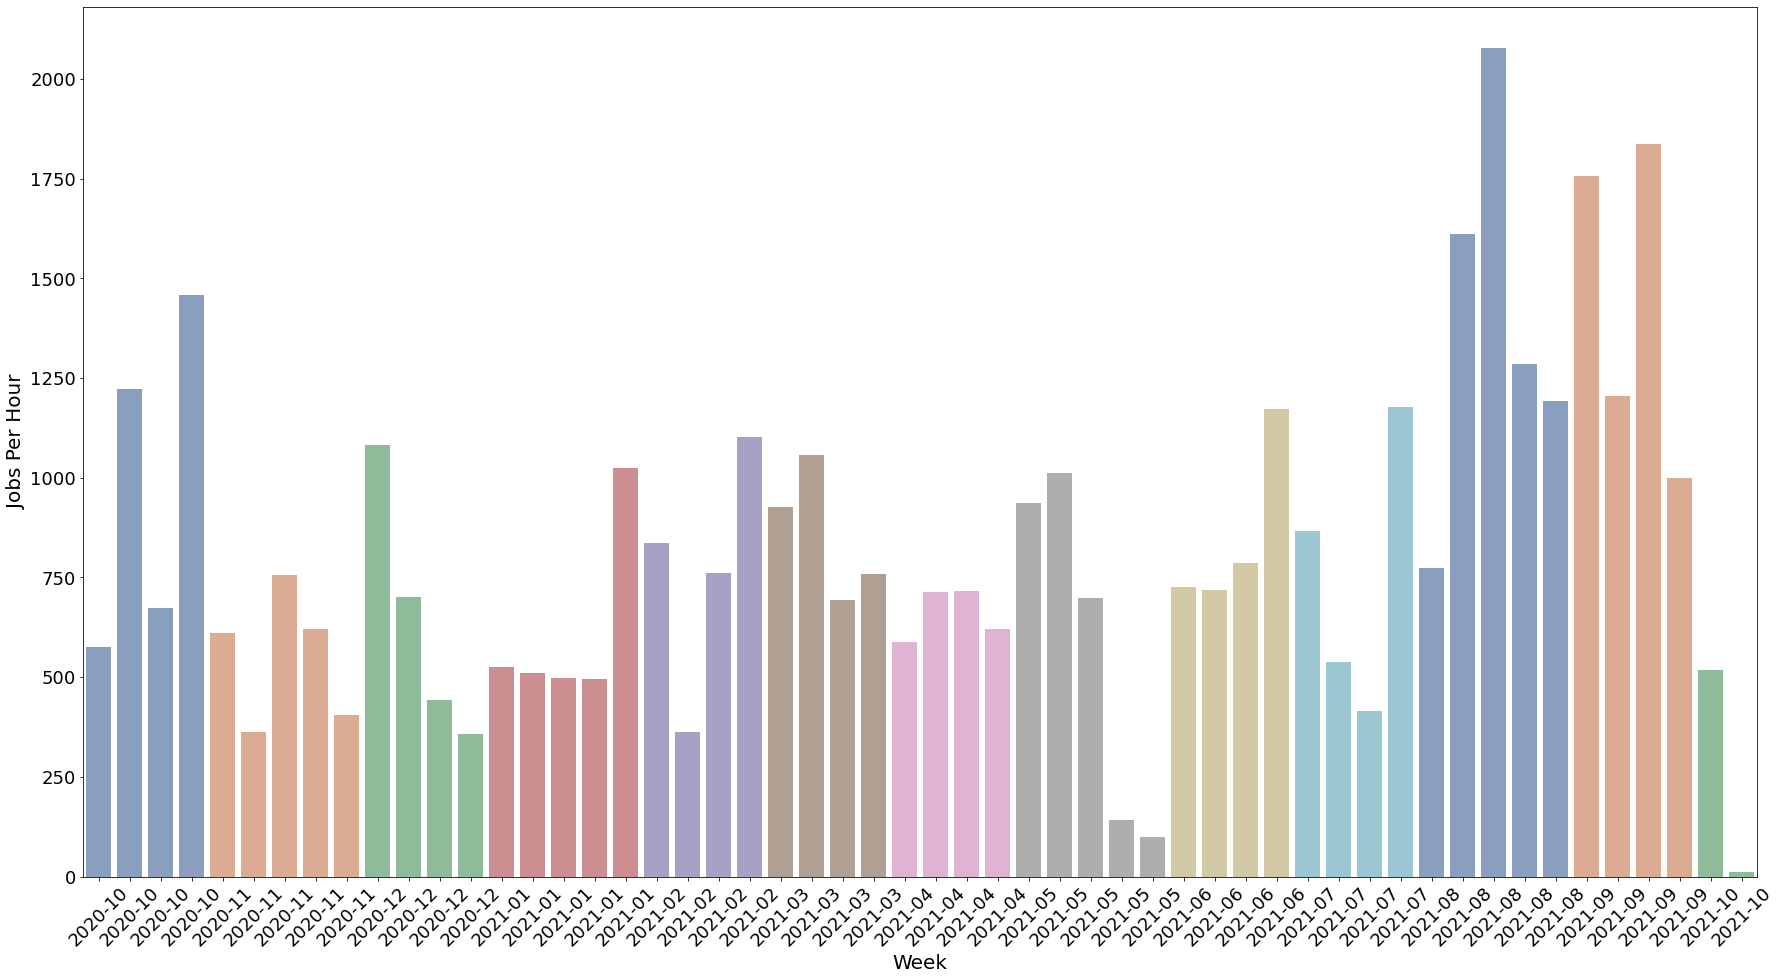

In [9]:
# Total jobs ended each month
weekly_jobs_ended_by_hour = jobs.groupby(pd.Grouper(key='END',freq='W')).count()/168
weekly_jobs_ended_by_hour = weekly_jobs_ended_by_hour.reset_index()

# Total jobs completed each month
weekly_jobs_completed_by_hour = jobs[jobs['STATE'] == 'COMPLETED'].groupby(pd.Grouper(key='END',freq='M')).count()/168
weekly_jobs_completed_by_hour = weekly_jobs_completed_by_hour.reset_index()

# Format date ticks for x axis and define fontsize
date_labels = weekly_jobs_ended_by_hour['END'].dt.strftime('%Y-%m')
fontsize = 20

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30,16))
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = weekly_jobs_ended_by_hour, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax,
            alpha = 0.7)
# sns.barplot(x = 'END', 
#             y = 'JOBID', 
#             data = weekly_jobs_completed_by_hour, 
#             hue = date_labels, 
#             dodge = False, 
#             palette = "deep",
#             ax = ax)

plt.xlabel('Week', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 45)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2);

ax.get_legend().set_visible(False);

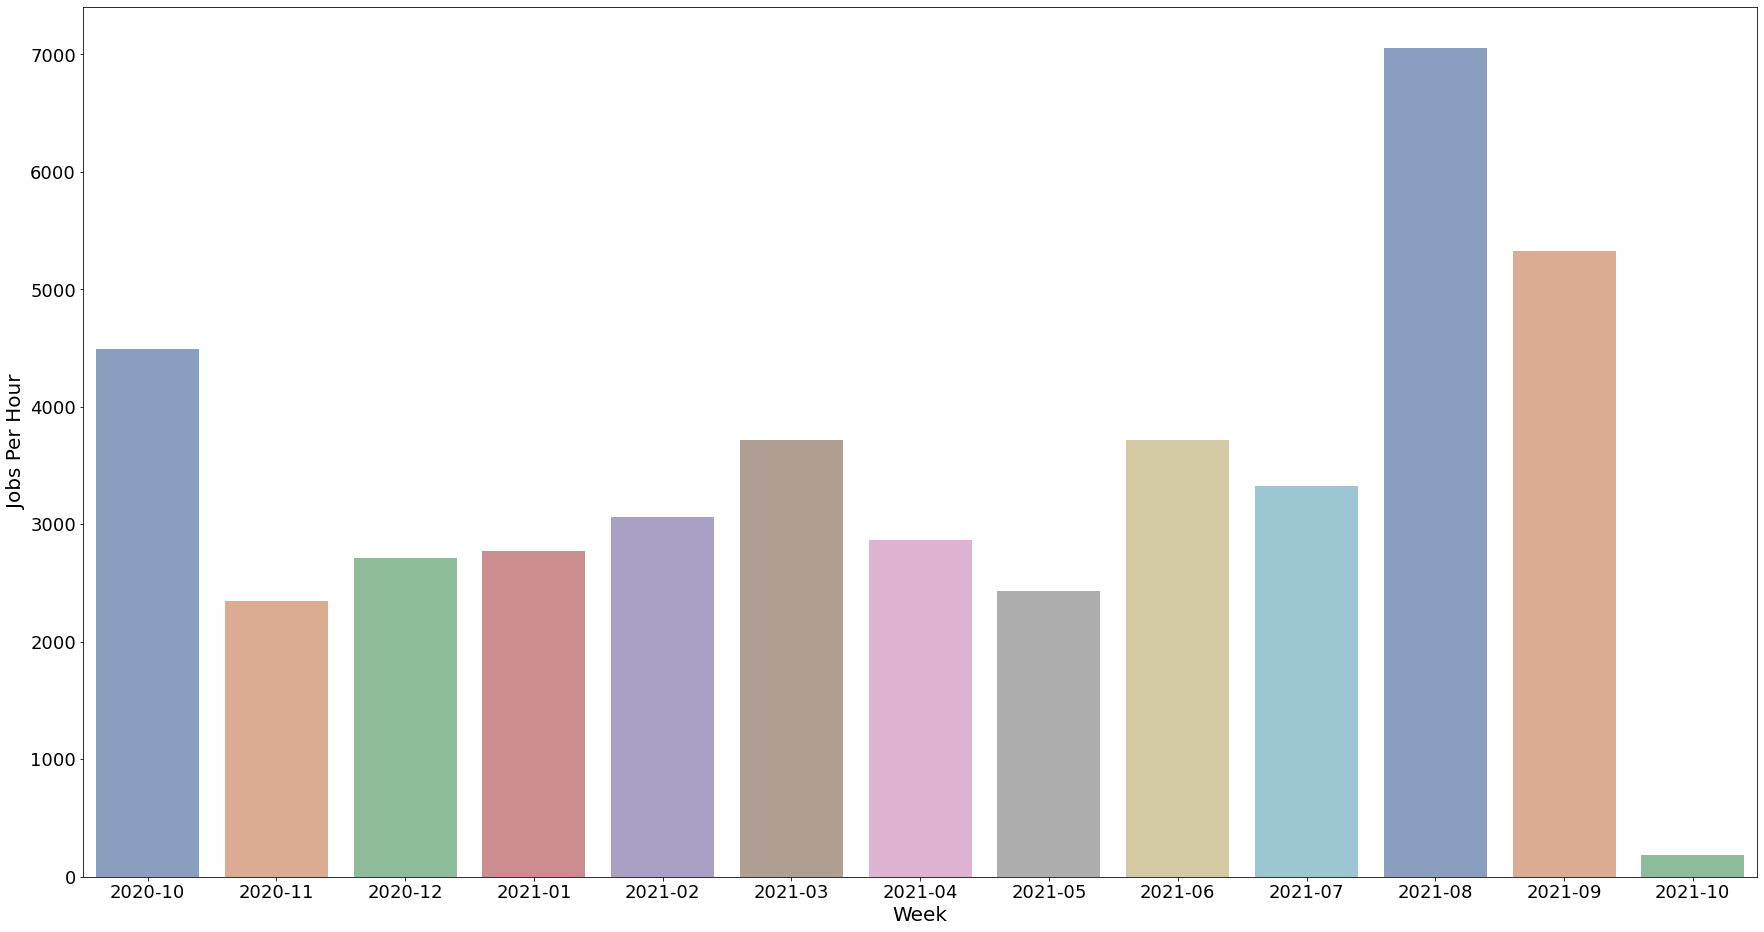

In [10]:
# Total jobs ended each month
weekly_jobs_ended_by_hour = jobs.groupby(pd.Grouper(key='END',freq='M')).count()/168
weekly_jobs_ended_by_hour = weekly_jobs_ended_by_hour.reset_index()

# Total jobs completed each month
weekly_jobs_completed_by_hour = jobs[jobs['STATE'] == 'COMPLETED'].groupby(pd.Grouper(key='END',freq='M')).count()/168
weekly_jobs_completed_by_hour = weekly_jobs_completed_by_hour.reset_index()

# Format date ticks for x axis and define fontsize
date_labels = weekly_jobs_ended_by_hour['END'].dt.strftime('%Y-%m')
fontsize = 20

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30,16))
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = weekly_jobs_ended_by_hour, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax,
            alpha = 0.7)
# sns.barplot(x = 'END', 
#             y = 'JOBID', 
#             data = weekly_jobs_completed_by_hour, 
#             hue = date_labels, 
#             dodge = False, 
#             palette = "deep",
#             ax = ax)

plt.xlabel('Week', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2);

ax.get_legend().set_visible(False);

## Question 2: What does the completions per hour look like over the time span of the dataset?

## Question 3: Are there weekly trends, and has it been increasing over the last year?

In [11]:
jobs.groupby([jobs.END.dt.year, jobs.END.dt.month, jobs.END.dt.day, jobs.END.dt.hour]).count()

JOBID  STATE  BEGIN   END  REQMEM  USEDMEM  REQTIME  \
END  END END END                                                        
2020 10  1   0      421    421    421   421     421      421      421   
             1     1080   1080   1080  1080    1080     1080     1080   
             2     1137   1137   1137  1137    1137     1137     1137   
             3     1022   1022   1022  1022    1022     1022     1022   
             4     1244   1244   1244  1244    1244     1244     1244   
...                 ...    ...    ...   ...     ...      ...      ...   
2021 10  7   16       8      8      8     8       8        8        8   
             17       8      8      8     8       8        8        8   
             18       8      8      8     8       8        8        8   
             19       8      8      8     8       8        8        8   
             20       6      6      6     6       6        6        6   

                  USEDTIME  NODES  CPUS  PARTITION  EXITCODE  JOBLENGTH  \
END  END END END                                                          
2020 10  1   0         421    421   421        421       421        421   
             1        1080   1080  1080       1080      1080       1080   
             2        1137   1137  1137       1137      1137       1137   
             3        1022   1022  1022       1022      1022       1022   
             4        1244   1244  1244       1244      1244       1244   
...                    ...    ...   ...        ...       ...        ...   
2021 10  7   16          8      8     8          8         8          8   
             17          8      8     8          8         8          8   
             18          8      8     8          8         8          8   
             19          8      8     8          8         8          8   
             20          6      6     6          6         6          6   

                  REQMEMTOT  REQMEMPERCORE  GROUP1H  
END  END END END                                     
2020 10  1   0          421            421      421  
             1         1080           1080     1080  
             2         1137           1137     1137  
             3         1022           1022     1022  
             4         1244           1244     1244  
...                     ...            ...      ...  
2021 10  7   16           8              8        8  
             17           8              8        8  
             18           8              8        8  
             19           8              8        8  
             20           6              6        6  

[8922 rows x 16 columns]

Boxplot = Group by month and graph ? on y-axis
Violin plot with x-axis = months (Oct. 2020 thru Oct. 2021) and y-axis = ?

It seems that the amount of jobs per hour increase in the August to September time frame. Coincidentally this correlates to the beginning of the school year. If we could analyze the data for the rest of 2020, 2019 and 2018, we could test further validate this hypothesis.

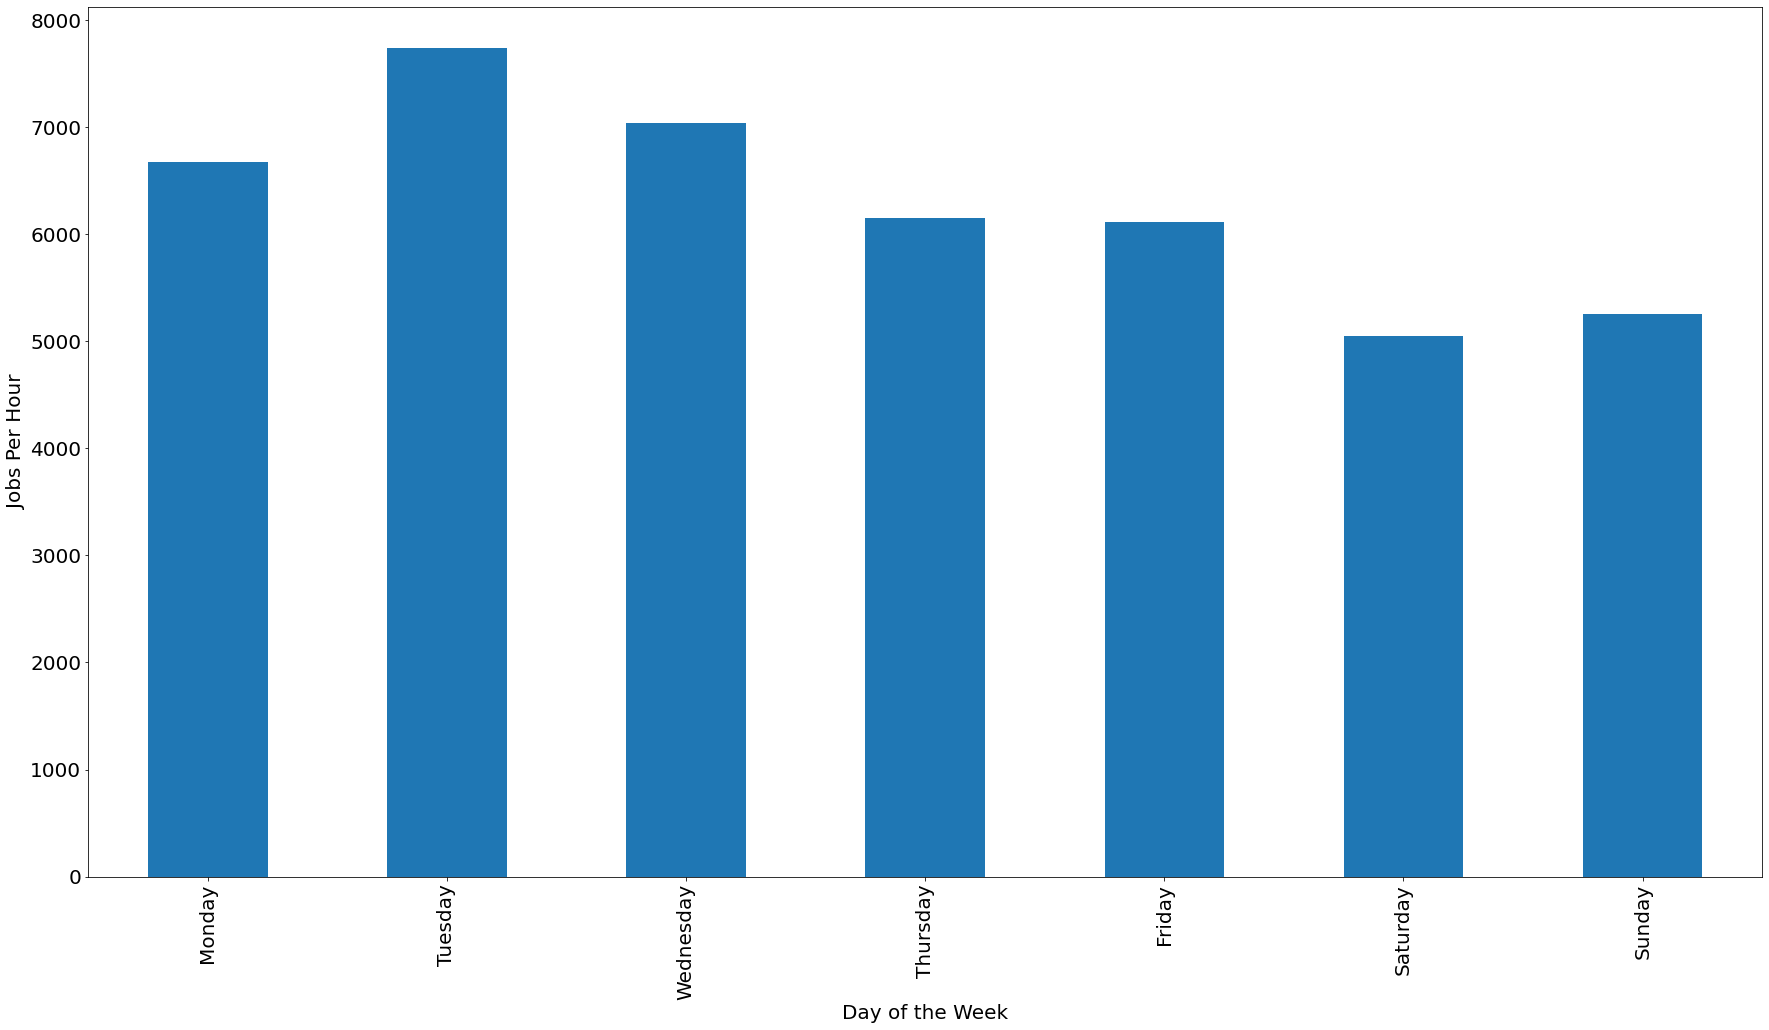

In [12]:
daily_jobs_ended_per_hour = jobs.groupby(jobs['END'].dt.day_name()).count()['JOBID']/168
daily_jobs_ended_per_hour = daily_jobs_ended_per_hour.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig, ax = plt.subplots(figsize=(30,16))
daily_jobs_ended_per_hour.plot(kind='bar')

plt.xlabel('Day of the Week', fontsize=20)
day_labels = daily_jobs_ended_per_hour.index
ax.set_xticklabels(labels=day_labels, rotation=90, fontsize=20)

plt.ylabel('Jobs Per Hour', fontsize=20)
plt.yticks(fontsize=20);

On average, it looks like the completed jobs per hour are higher at the beginning of the week (Monday thru Wednesday) and decrease as the week goes on.

## Question 4: Does the job state affect completions per hour? i.e. if I only look at jobs with exit code 0:0 in the "COMPLETED" state, is that a similar number of completions per hour as with all jobs, failed or cancelled? This will indicate if the load on the scheduler is by user design or is a result of users not sufficiently testing their jobs before submitting very large arrays. We also expect that most job completions will be in the "production" partition, but is this actually true?

## Question 5: Calculate some descriptive statistics about how often the scheduler was unresponsive, how long these periods of time were, and create a time series plot of when the scheduler was having difficulties.

In [13]:
logs['TIMELAPS'].str.extract('(\w+\s\d)')

,0
0,time 0
1,time 0
2,time 0
3,time 0
4,time 0
...,...
9547408,time 0
9547409,time 0
9547410,time 0
9547411,time 0


In [14]:
logs

,DATE,USER,RETRY,TIMELAPS,RETURNCODE,COMMAND,SERVERID
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",ce5
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",ce5
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",ce5
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",ce5
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",ce5
...,...,...,...,...,...,...,...
9547408,2021-10-07 21:59:35.014602,user 9221,retry 0,time 0.060086965560913086,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",ce6
9547409,2021-10-07 21:59:35.238970,user 9202,retry 0,time 0.09804415702819824,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",ce6
9547410,2021-10-07 21:59:57.265189,user 9203,retry 0,time 0.02454972267150879,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",ce6
9547411,2021-10-07 22:00:04.024360,user 9201,retry 0,time 0.03941917419433594,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",ce6


In [15]:
logs[(logs['USER'] == 'user 9204') 
     & (logs['RETURNCODE'] == 'returncode 1')
    & ()]

ValueError: operands could not be broadcast together with shapes (9547413,) (0,) 

## Question 6: Finally, combine the time series information from the two datasets together to see how well correlated heavy job-completion load is with the unresponsiveness, and to see if there is some threshold of job completions per hour that generally results in unresponsiveness.